In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings ('ignore') # Suppress warnings

In [6]:
data = pd.read_csv("customer_support_tickets.csv")
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [7]:
data.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [8]:
data_cleaned = data[data['Customer Satisfaction Rating'].notnull()].copy()

In [42]:
data_cleaned['Date of Purchase'] = pd.to_datetime(data_cleaned['Date of Purchase'], errors="coerce")
data_cleaned['First Response Time'] = pd.to_datetime(data_cleaned['First Response Time'], errors="coerce")
data_cleaned['Time to Resolution'] = pd.to_datetime(data_cleaned[ 'Time to Resolution'], errors="coerce")

In [17]:
data_cleaned['Response Delay (hrs)'] = ((data_cleaned['First Response Time'] - data_cleaned['Date of Purchase']).dt.total_seconds()/3600)
data_cleaned['Resolution Time (hrs)'] = ((data_cleaned ["Time to Resolution"] - data_cleaned['First Response Time']).dt.total_seconds()/3608)

In [19]:
drop_cols=  ['Ticket ID', 'Customer Name', 'Customer Email', 'Ticket Subject', 'Ticket Description']
data_cleaned.drop(columns=drop_cols, inplace=True)

In [20]:
data_cleaned.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Response Delay (hrs),Resolution Time (hrs)
2,48,Other,Dell XPS,2020-07-14,Technical issue,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,25259.243889,6.834812
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,22327.494444,-5.521064
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,29112.211667,19.639690
10,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,20729.780278,-17.876940
11,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,14052.097500,-2.627494


In [21]:
data_cleaned.shape

(2769, 14)

In [22]:
data_cleaned.isnull().sum()

,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Status,0
Resolution,0
Ticket Priority,0
Ticket Channel,0
First Response Time,0


In [23]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Customer Age                  2769 non-null   int64         
 1   Customer Gender               2769 non-null   object        
 2   Product Purchased             2769 non-null   object        
 3   Date of Purchase              2769 non-null   datetime64[ns]
 4   Ticket Type                   2769 non-null   object        
 5   Ticket Status                 2769 non-null   object        
 6   Resolution                    2769 non-null   object        
 7   Ticket Priority               2769 non-null   object        
 8   Ticket Channel                2769 non-null   object        
 9   First Response Time           2769 non-null   datetime64[ns]
 10  Time to Resolution            2769 non-null   datetime64[ns]
 11  Customer Satisfaction Rating  2769 

In [24]:
data_cleaned.describe()

,Customer Age,Date of Purchase,First Response Time,Time to Resolution,Customer Satisfaction Rating,Response Delay (hrs),Resolution Time (hrs)
count,2769.000000,2769,2769,2769,2769.000000,2769.000000,2769.000000
mean,44.333694,2020-12-28 16:55:38.678223104,2023-06-01 11:20:49.245575936,2023-06-01 11:17:21.509931520,2.991333,21234.419602,-0.057576
min,18.000000,2020-01-01 00:00:00,2023-05-31 21:55:39,2023-05-31 21:53:30,1.000000,12435.154722,-23.181818
25%,31.000000,2020-06-29 00:00:00,2023-06-01 05:19:36,2023-06-01 05:34:43,2.000000,16806.461389,-6.917960
50%,45.000000,2020-12-26 00:00:00,2023-06-01 11:22:02,2023-06-01 11:17:48,3.000000,21303.618056,0.166297
75%,57.000000,2021-07-01 00:00:00,2023-06-01 17:27:08,2023-06-01 17:07:32,4.000000,25608.873889,6.468958
max,70.000000,2021-12-30 00:00:00,2023-06-02 00:54:21,2023-06-02 00:55:33,5.000000,29942.468889,23.414634
std,15.195495,NaN,NaN,NaN,1.407016,5075.873272,9.542906


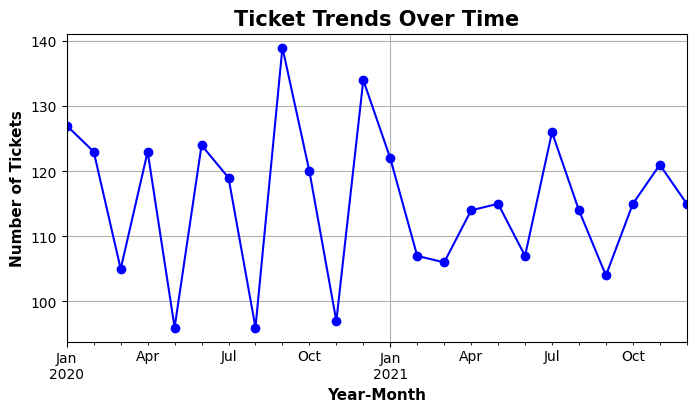

In [26]:
#Analyze customer support ticket trends
data_cleaned ['YearMonth'] = data_cleaned['Date of Purchase'].dt.to_period('M')
ticket_trends = data_cleaned.groupby('YearMonth').size()
plt.figure(figsize=(8,4))
ticket_trends.plot(kind='line', marker='o', linestyle='-',color='blue')
plt.grid(True)
plt.title('Ticket Trends Over Time', fontsize=15, fontweight='bold')
plt.xlabel('Year-Month', fontsize=11, fontweight='bold')
plt.ylabel('Number of Tickets', fontsize=11, fontweight='bold')
plt.show()

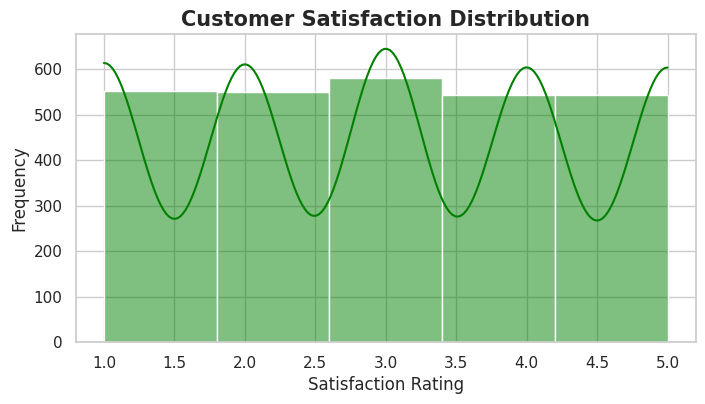

In [27]:
#Customer Satisfaction Distribution
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.histplot(data=data_cleaned, x='Customer Satisfaction Rating', color='green', bins=5, kde=True)
plt.title('Customer Satisfaction Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

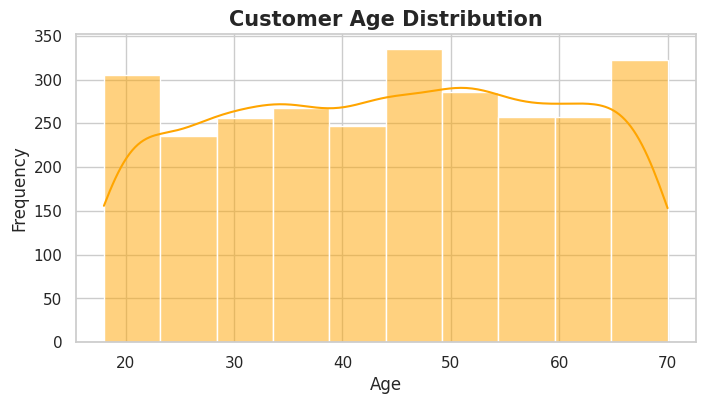

In [30]:
# Customer age Distribution
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.histplot(data=data_cleaned, x='Customer Age', color='orange', bins=10, kde=True)
plt.title('Customer Age Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

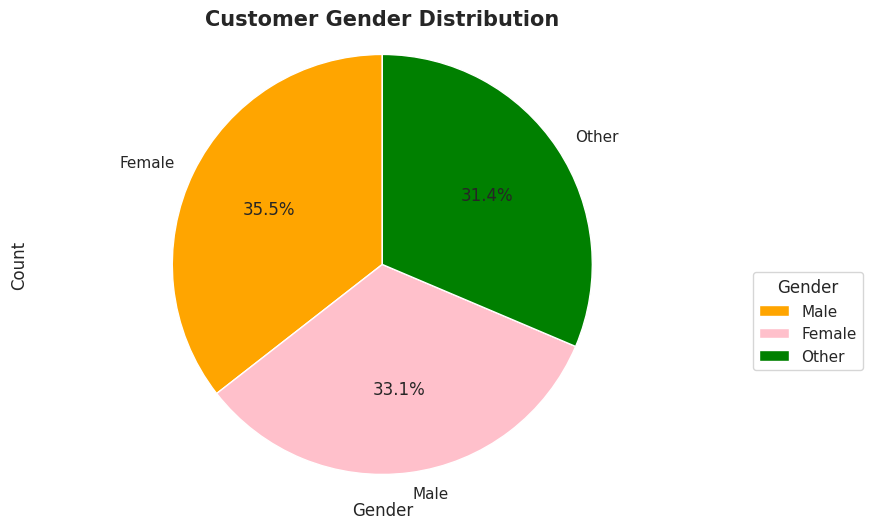

In [31]:
#Customer Gender Distribution
plt.figure(figsize=(9,6))
color_map = {'Male': 'orange', 'Female': 'pink', 'Other': 'green'}
plt.pie(data_cleaned['Customer Gender'].value_counts(), labels=data_cleaned['Customer Gender'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=color_map.values())
plt.axis('equal')
plt.legend(color_map.keys(), title='Gender', loc='upper right', bbox_to_anchor=(1.2, 0.5))
plt.title('Customer Gender Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

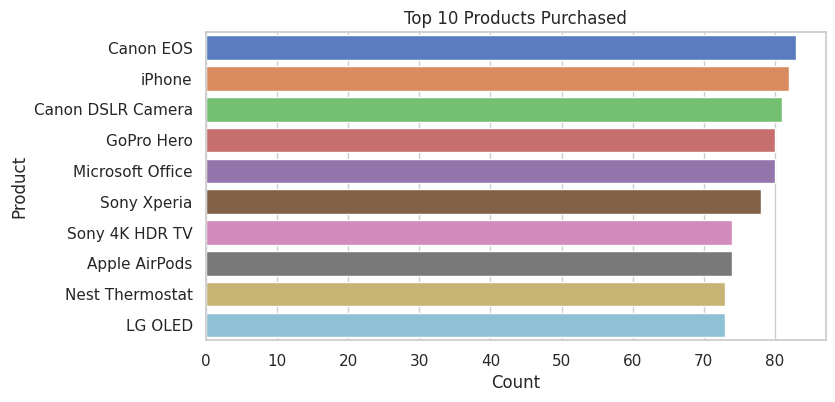

In [32]:
#Product Purchased Distribution
plt.figure(figsize=(8,4))
product_purchased_distribution = data_cleaned['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index, x=product_purchased_distribution, palette= 'muted')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

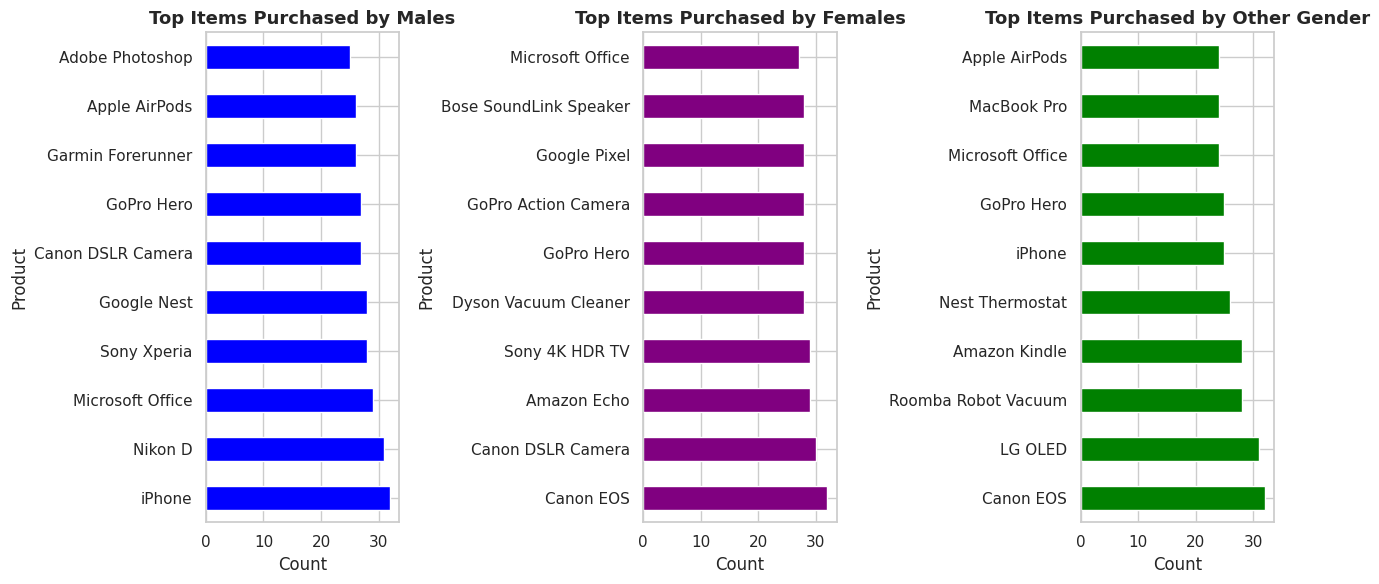

In [33]:
# Top Items Purchased by Gender (Horizontal Bar Chart)
plt.figure(figsize=(13, 6))
# Top Items Purchased by Males
plt.subplot(1, 3, 1)
male_top_items = data_cleaned [data_cleaned['Customer Gender'] == 'Male']['Product Purchased'].value_counts().head(10)
male_top_items.plot(kind='barh', color='blue')
plt.title('Top Items Purchased by Males', fontsize=13, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Product')
# Top Items Purchased by Females
plt.subplot(1, 3, 2)
female_top_items = data_cleaned [data_cleaned['Customer Gender'] == 'Female']['Product Purchased'].value_counts().head(10)
female_top_items.plot(kind='barh', color='purple')
plt.title('Top Items Purchased by Females', fontsize=13, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Product')
# Top Items Purchased by Other Gender
plt.subplot(1, 3, 3)
other_top_items = data_cleaned [data_cleaned['Customer Gender']== 'Other']['Product Purchased'].value_counts().head(10)
other_top_items.plot(kind='barh', color='green')
plt.title('Top Items Purchased by Other Gender', fontsize=13, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

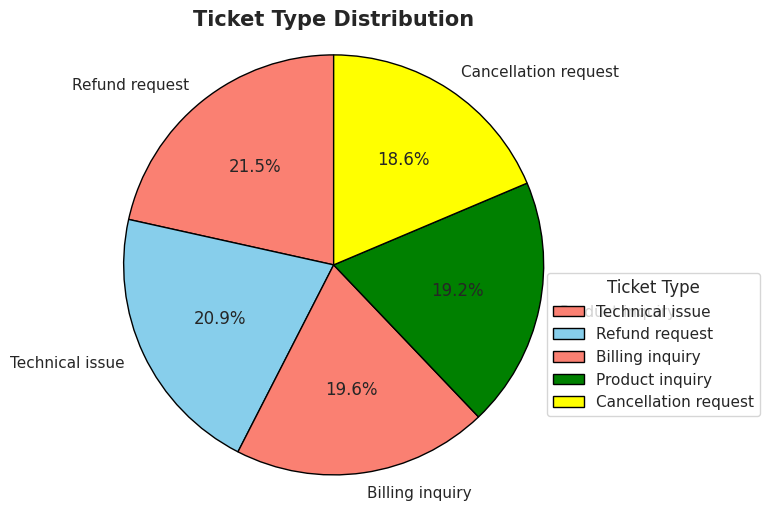

In [34]:
# Count ticket types
# Plot
plt.figure(figsize=(8, 6))
color_map = {'Technical issue': 'salmon', 'Refund request': 'skyblue', 'Billing inquiry': 'salmon', 'Product inquiry': 'green', 'Cancellation request': 'yellow'}
plt.pie(data_cleaned['Ticket Type'].value_counts(), labels=data_cleaned['Ticket Type'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=color_map.values(), wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.legend(color_map.keys(), title='Ticket Type', loc='upper right', bbox_to_anchor=(1.2, 0.5))
plt.title('Ticket Type Distribution', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

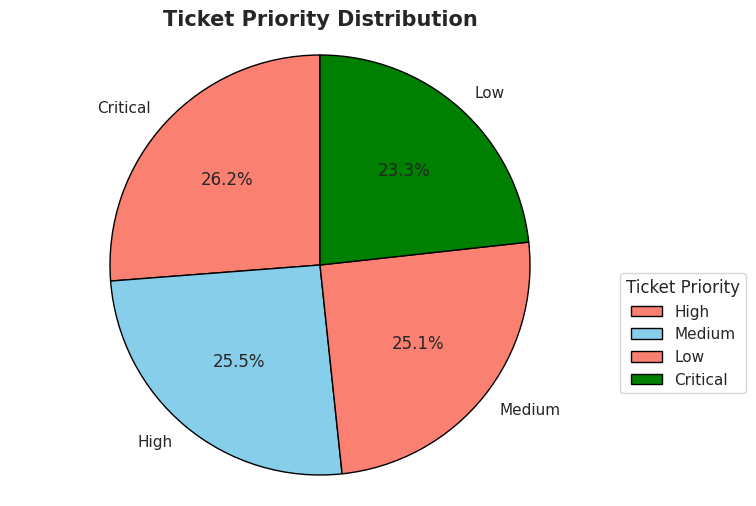

In [35]:
# Count ticket priorities
plt.figure(figsize=(8, 6))
color_map = {'High': 'salmon', 'Medium':'skyblue', 'Low': 'salmon', 'Critical': 'green'}
plt.pie(data_cleaned['Ticket Priority'].value_counts(), labels=data_cleaned['Ticket Priority'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=color_map.values(), wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.legend(color_map.keys(), title='Ticket Priority', loc='upper right', bbox_to_anchor=(1.2, 0.5))
plt.title('Ticket Priority Distribution', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel("")
plt.show()

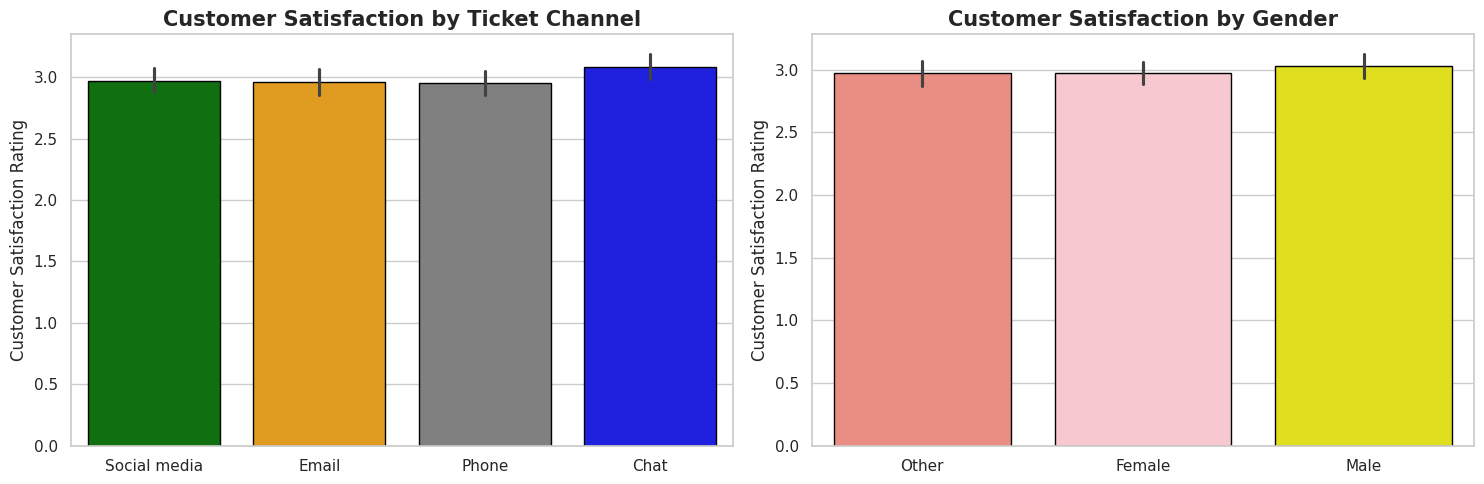

In [36]:
# Customer satisfaction by Ticket channel and gender
fig, axes = plt.subplots (1, 2, figsize=(15,5))
#Ticket channel
color_map = {'Email': 'orange', 'Phone': 'gray', 'Social media': 'green', 'Chat': 'blue'}
sns.barplot(data=data_cleaned, x='Ticket Channel', y='Customer Satisfaction Rating', ax=axes[0], palette=color_map, edgecolor='black')
axes[0].set_title('Customer Satisfaction by Ticket Channel', fontsize=15, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('Customer Satisfaction Rating')
#Gender
color_map = {'Male': 'yellow', 'Female': 'pink', 'Other': 'salmon'}
sns.barplot(data=data_cleaned, x='Customer Gender', y='Customer Satisfaction Rating', ax=axes [1], palette=color_map, edgecolor='black')
axes[1].set_title('Customer Satisfaction by Gender', fontsize=15, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('Customer Satisfaction Rating')
plt.tight_layout()
plt.show()

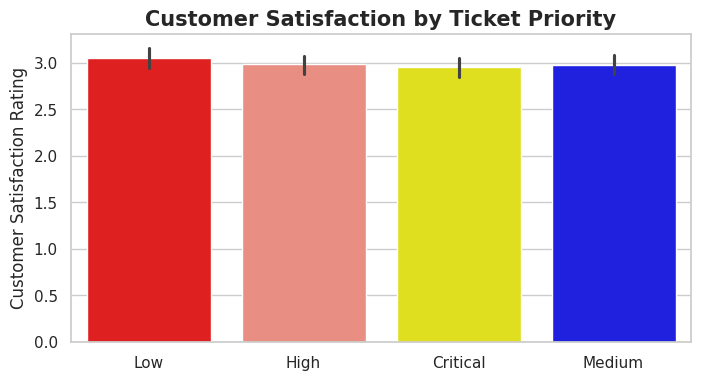

In [37]:
#Customer satisfaction by ticket priority
plt.figure(figsize=(8,4))
color_map = {'High':'salmon', 'Medium': 'blue', 'Low': 'red', 'Critical': 'yellow'}
sns.barplot(data=data_cleaned, x='Ticket Priority', y='Customer Satisfaction Rating', palette=color_map)
plt.title('Customer Satisfaction by Ticket Priority', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('Customer Satisfaction Rating')
plt.show()

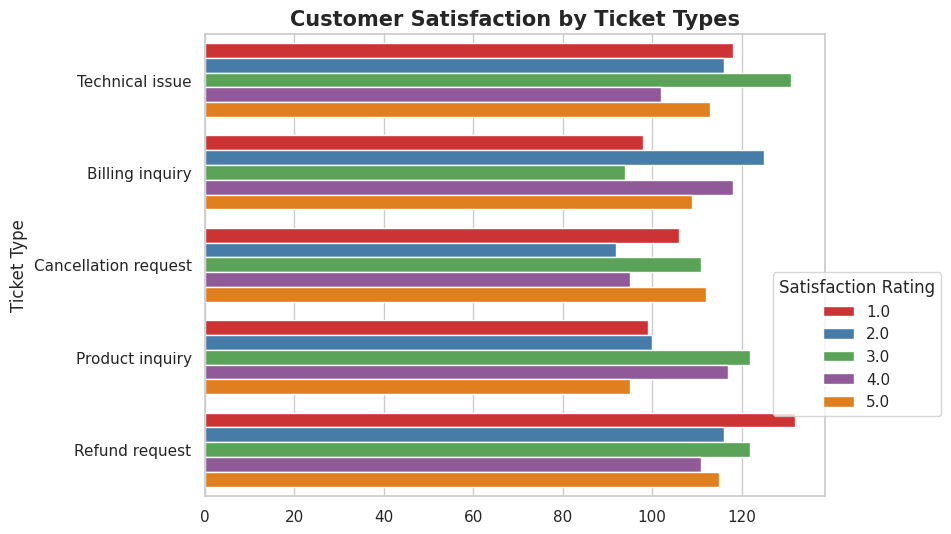

In [38]:
# Set the style
sns.set(style="whitegrid")
# Plot
plt.figure(figsize=(8,6))
# Replace these with your actual brand colors
sns.countplot(data=data_cleaned, y='Ticket Type', hue='Customer Satisfaction Rating', palette='Set1')
plt.title('Customer Satisfaction by Ticket Types', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('Ticket Type')
plt.legend(title='Satisfaction Rating', loc='upper right', bbox_to_anchor=(1.2, 0.5))
plt.show()

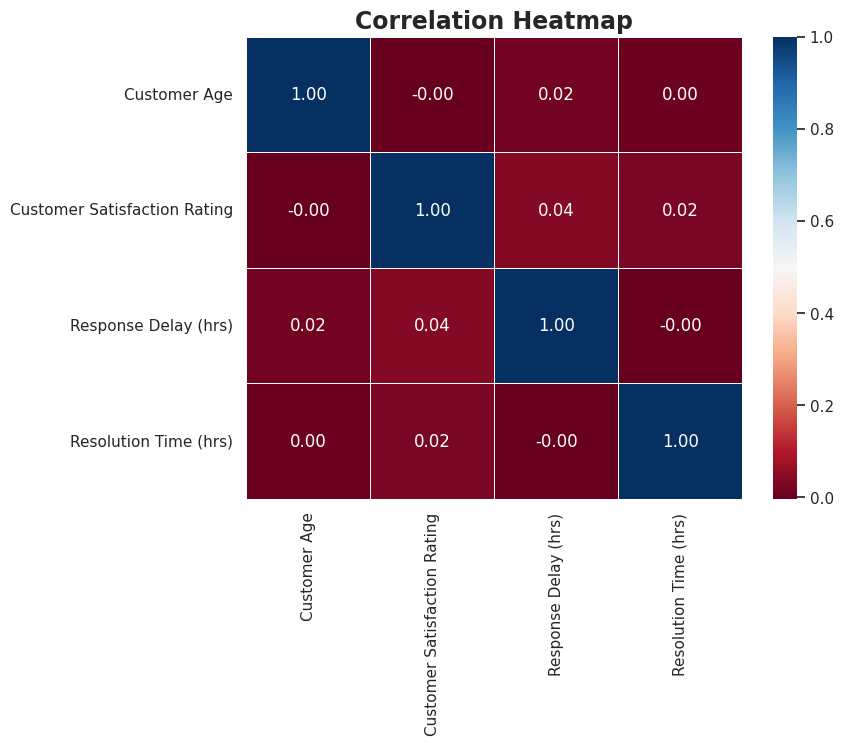

In [39]:
# Correlation heatmap for numeric variables only
corr_matrix = data_cleaned.select_dtypes (include='number').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=17, fontweight='bold')
plt.show()

Confusion Matrix:
[[292  46]
 [187  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.86      0.71       338
           1       0.39      0.13      0.20       216

    accuracy                           0.58       554
   macro avg       0.50      0.50      0.46       554
weighted avg       0.52      0.58      0.51       554



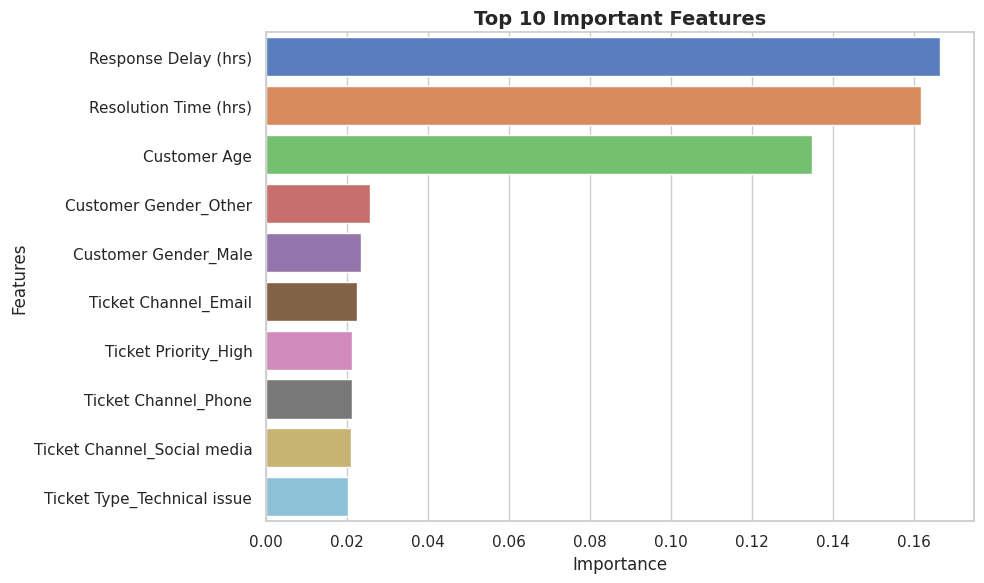

In [41]:
# One-hot encode categorical features
data_cleaned_encoded = pd.get_dummies(data_cleaned, columns=['Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Status', 'Ticket Priority', 'Ticket Channel'], drop_first=True)
#Drop unneeded columns
drop_cols=['Date of Purchase', 'First Response Time', 'Time to Resolution', 'Resolution']
if 'YearMonth' in data_cleaned_encoded.columns:
     drop_cols.append('YearMonth')
data_cleaned_model = data_cleaned_encoded.drop(columns=drop_cols)
# Define target as binary: 1 if rating >= 4, else 0
data_cleaned_model['Satisfied'] = (data_cleaned_model['Customer Satisfaction Rating'] >= 4).astype(int)
# Define features and target
X = data_cleaned_model.drop(columns=['Customer Satisfaction Rating', 'Satisfied'])
y = data_cleaned_model['Satisfied']
#Scale numeric columns
scaler = StandardScaler()
numeric_cols = ['Customer Age', 'Response Delay (hrs)', 'Resolution Time (hrs)']
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Feature Importance (same as before)
feature_importance = pd.Series (model.feature_importances_, index=X.columns).sort_values(ascending=False)
# Plot Top 10 Important Features
plt.figure(figsize=(10,6))
colors = sns.color_palette("muted", n_colors=10)
sns.barplot(x=feature_importance.head (10), y=feature_importance.head (10).index, palette=colors)
plt.title("Top 10 Important Features", fontsize=14, fontweight='bold')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()